In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

# Get data with web scraping

In [2]:
df = pd.read_csv('Best_Books_Ever.csv')

In [3]:
df.head()

,title,author,published_date,rating,rating_n,review_n,introduction,genre,page,books_written_n,author_followers,link
0,The Hunger Games,Suzanne Collins,"First published September 14, 2008",4.33,"7,938,345 ratings","195,436 reviews","Could you survive on your own in the wild, wit...","['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","374 pages, Hardcover",49,93k,https://www.goodreads.com/book/show/2767052-th...
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,"First published June 21, 2003",4.50,"3,138,144 ratings","56,851 reviews",Harry Potter is about to start his fifth year ...,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","912 pages, Paperback",562,221k,https://www.goodreads.com/book/show/2.Harry_Po...
2,Pride and Prejudice,Jane Austen,"First published January 28, 1813",4.28,"3,930,925 ratings","99,795 reviews","Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...","279 pages, Paperback","3,939",62.1k,https://www.goodreads.com/book/show/1885.Pride...
3,To Kill a Mockingbird,Harper Lee,"First published January 1, 1960",4.27,"5,675,438 ratings","109,843 reviews",The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...","336 pages, Paperback",69,12.9k,https://www.goodreads.com/book/show/2657.To_Ki...
4,The Book Thief,Markus Zusak,"First published March 1, 2006",4.39,"2,357,114 ratings","135,561 reviews",Librarian's note: An alternate cover edition c...,"['Historical Fiction', 'Fiction', 'Young Adult...","552 pages, Hardcover",27,38.1k,https://www.goodreads.com/book/show/19063.The_...


# data cleaning

In [4]:
df.shape

(8899, 12)

In [5]:
df.dtypes

title                object
author               object
published_date       object
rating              float64
rating_n             object
review_n             object
introduction         object
genre                object
page                 object
books_written_n      object
author_followers     object
link                 object
dtype: object

### NaN value

In [6]:
df.isna().sum()

title                61
author               61
published_date       94
rating               61
rating_n             61
review_n             61
introduction        101
genre                61
page                 77
books_written_n      62
author_followers     82
link                  0
dtype: int64

In [7]:
df[df['title'].isna()].head()

,title,author,published_date,rating,rating_n,review_n,introduction,genre,page,books_written_n,author_followers,link
272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.goodreads.com/book/show/39280444-s...
1395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.goodreads.com/book/show/13089710-t...
1505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.goodreads.com/book/show/56060300-h...
1530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.goodreads.com/book/show/20698530-p...
1532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.goodreads.com/book/show/12875258-t...


In [8]:
df = df.dropna(subset=['title'])

In [9]:
df.isna().sum()

title                0
author               0
published_date      33
rating               0
rating_n             0
review_n             0
introduction        40
genre                0
page                16
books_written_n      1
author_followers    21
link                 0
dtype: int64

In [10]:
df.shape

(8838, 12)

#### deal with publieshed_date

In [11]:
df['published_date'] = df['published_date'].str.split('shed',expand=True)[1]

In [12]:
df['published_date'].str.split(' ', expand=True)

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,,September,"14,",2008,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,,June,"21,",2003,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,,January,"28,",1813,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,,January,"1,",1960,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,,March,"1,",2006,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8894,,October,"15,",2013,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8895,,November,"19,",2014,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8896,,October,"14,",2014,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8897,,November,"1,",2018,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [13]:
# Create a new column for year
df['published_year'] = df['published_date'].str.split(' ', expand=True)[3]
df['published_year'] = pd.to_numeric(df['published_year'], errors='coerce')

# Create a new column for month
df['published_month'] = df['published_date'].str.split(' ', expand=True)[1]

month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
              'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
df['published_month'] = df['published_month'].fillna('0').map(month_dict)

# Create a new column for day
df['published_day'] = df['published_date'].str.split(' ', expand=True)[2]
df['published_day'] = df['published_day'].str.rstrip(',')
df['published_day'] = pd.to_numeric(df['published_day'], errors='coerce')

In [14]:
df.isna().sum()

title                 0
author                0
published_date      335
rating                0
rating_n              0
review_n              0
introduction         40
genre                 0
page                 16
books_written_n       1
author_followers     21
link                  0
published_year      342
published_month     342
published_day       341
dtype: int64

In [15]:
df['published_year'].value_counts(dropna=False)

2013.0    440
2012.0    439
2011.0    393
2010.0    346
NaN       342
         ... 
1767.0      1
1818.0      1
8.0         1
900.0       1
60.0        1
Name: published_year, Length: 326, dtype: int64

In [16]:
# Replace NAN with average 1980
df['published_year'] = df['published_year'].fillna(np.ceil(np.mean(df['published_year']))).astype(int)

In [17]:
def modify_published_year(x):
    if x < 24:
        return x + 2000
    elif x < 1000:
        return x + 1000
    else:
        return x

df['published_year'] = df['published_year'].apply(modify_published_year)

In [18]:
df['published_month'].value_counts(dropna=False)

1.0     2914
10.0     685
9.0      684
5.0      576
4.0      562
8.0      533
3.0      502
6.0      481
11.0     456
2.0      411
7.0      370
NaN      342
12.0     322
Name: published_month, dtype: int64

In [19]:
# Replace NAN with 0
df['published_month'] = df['published_month'].fillna(0).astype(int)
df['published_day'] = df['published_day'].fillna(0).astype(int)

In [20]:
df = df.drop('published_date', axis=1)

#### deal with rating_n, review_n

In [21]:
df['rating_n'].value_counts(dropna=False)

0 ratings          12
74 ratings          6
105 ratings         6
18 ratings          5
132 ratings         5
                   ..
53,032 ratings      1
30,793 ratings      1
26,755 ratings      1
105,943 ratings     1
2,241 ratings       1
Name: rating_n, Length: 8317, dtype: int64

In [22]:
df['rating_n'] = df['rating_n'].str.split('r',expand=True)[0]
df['rating_n'] = df['rating_n'].fillna('0').str.replace(',', '').astype(int)

In [23]:
df['review_n'] = df['review_n'].str.split('r',expand=True)[0]
df['review_n'] = df['review_n'].fillna('0').str.replace(',', '').astype(int)

#### deal with author_followers

In [24]:
# Replace NAN with average 27897
df['author_followers'] = df['author_followers'].fillna(27897).astype(str).str.replace('follower', '')

In [25]:
for i, x in enumerate(df['author_followers']):
    x_str = str(x)  
    if 'k' in x_str:
        if '.' in x_str:
            df.at[i, 'author_followers'] = int(float(x_str.replace('k', '').replace(',', '').replace('.', '')) * 100)
        else:
            df.at[i, 'author_followers'] = int(x_str.replace('k', '').replace(',', '')) * 1000
    else:
        df.at[i, 'author_followers'] = int(x_str.replace(',', ''))

In [26]:
for i, x in enumerate(df['author_followers']):
    x_str = str(x)  
    if 'k' in x_str:
        if '.' in x_str:
            df.at[i, 'author_followers'] = int(float(x_str.replace('k', '').replace(',', '').replace('.', '')) * 100)
        else:
            df.at[i, 'author_followers'] = int(x_str.replace('k', '').replace(',', '')) * 1000
    else:
        df.at[i, 'author_followers'] = int(x_str.replace(',', ''))
df['author_followers'] = df['author_followers'].astype(int)  

In [27]:
np.mean(df['author_followers'])

27957.292617147996

In [28]:
df = df.dropna(subset=['title'])

In [29]:
df['rating_n'] = df['rating_n'].astype(int)
df['review_n'] = df['review_n'].astype(int)
df['published_month'] = df['published_month'].astype(int)
df['published_day'] = df['published_day'].astype(int)
df['published_year'] = df['published_year'].astype(int)

#### deal with page

In [30]:
df['pages'] = df['page'].str.split('pages,', expand=True)[0]
df['bookformat'] = df['page'].str.split('pages,', expand=True)[1]

In [31]:
# Replace NAN with average 362
df['pages'] = pd.to_numeric(df['pages'], errors='coerce').fillna(362)

In [32]:
df['pages'] = df['pages'].astype(int)

In [33]:
np.mean(df['pages'])

381.0168590178773

In [34]:
df['bookformat'] = df['bookformat'].fillna('other')

In [35]:
df['bookformat'] = df['bookformat'].apply(lambda x: x.replace("None", "other"))
df['bookformat'] = df['bookformat'].apply(lambda x: x.replace("MP3 CD", "Audiobook"))
df['bookformat'] = df['bookformat'].apply(lambda x: x.replace("Trade Paperback", "Paperback"))
df['bookformat'] = df['bookformat'].apply(lambda x: x.replace("Slipcased Hardcover", "Hardcover"))
df['bookformat'] = df['bookformat'].apply(lambda x: x.replace("hardcover", "Hardcover"))
df['bookformat'] = df['bookformat'].apply(lambda x: x.replace("Audible Audio", "Audiobook"))
df['bookformat'] = df['bookformat'].apply(lambda x: x.replace("Audio CD", "Audiobook"))
df['bookformat'] = df['bookformat'].apply(lambda x: x.replace("Mass Market Paperback", "Paperback"))
df['bookformat'] = df['bookformat'].apply(lambda x: x.replace("Kindle Edition", "Kindle"))

In [36]:
data = pd.DataFrame(df['bookformat'].value_counts()).reset_index()

data.columns = ['format', 'counts']
other_format = list(data[data['counts']<20]['format'])

def clean_format(x):
    if x in other_format:
        return 'other'
    else:
        return x    

In [37]:
df['bookformat'] = list(map(clean_format, df['bookformat']))

In [38]:
df['bookformat'].value_counts()

 Paperback    4785
 Hardcover    2529
 Kindle        731
other          509
 ebook         263
 Audiobook      21
Name: bookformat, dtype: int64

In [39]:
df = df.drop('page', axis=1)

#### deal with books_written_n 

In [40]:
df['books_written_n'] = df['books_written_n'].str.replace(',', '')
df['books_written_n'] = df['books_written_n'].str.replace("14.6k", "14600", regex=True)
df['books_written_n'] = df['books_written_n'].str.replace("14.2k", "14200", regex=True)
df['books_written_n'] = df['books_written_n'].str.replace("243k", "243000", regex=True)
df['books_written_n'] = df['books_written_n'].str.replace("778k", "778000", regex=True)
df['books_written_n'] = df['books_written_n'].str.replace("11.9k", "11900", regex=True)
df['books_written_n'] = df['books_written_n'].str.replace("780k", "780000", regex=True)
df['books_written_n'] = df['books_written_n'].str.replace("12k", "12000", regex=True)
df['books_written_n'] = df['books_written_n'].str.replace("14.1k", "14100", regex=True)
df['books_written_n'] = df['books_written_n'].str.replace("242k", "242000", regex=True)

In [41]:
df[df['books_written_n'].isna()]

,title,author,rating,rating_n,review_n,introduction,genre,books_written_n,author_followers,link,published_year,published_month,published_day,pages,bookformat
3213,If We Were Villains,M. L Rio (author),4.22,165312,31392,Oliver Marks has just served ten years for a m...,"['Mystery', 'Fiction', 'Thriller', 'Contempora...",NaN,1409,https://www.goodreads.com/book/show/34369803-i...,2017,4,11,432,Paperback


In [42]:
# from the link, found the author has written 2 books
df['books_written_n'] = df['books_written_n'].fillna(2)

In [43]:
df['books_written_n'] = pd.to_numeric(df['books_written_n'])
df['books_written_n'] = df['books_written_n'].astype(int)

In [44]:
df['books_written_n'].value_counts(dropna=False)

14      121
11      119
6       117
2       111
7       107
       ... 
7124      1
1387      1
1141      1
3454      1
564       1
Name: books_written_n, Length: 964, dtype: int64

#### deal with introduction

In [45]:
df['introduction'] = df['introduction'].fillna('unknown')

#### deal with genre

In [46]:
df['genre'].value_counts(dropna=False)

[]                                                                                                     124
['Fiction']                                                                                             14
['Fantasy']                                                                                             13
['Vampires', 'Young Adult', 'Paranormal', 'Fantasy', 'Urban Fantasy', 'Romance', 'Supernatural']        12
['Fantasy', 'Fiction', 'Young Adult', 'Childrens', 'Animals', 'Adventure', 'Middle Grade']              12
                                                                                                      ... 
['Fantasy', 'Young Adult', 'Magic', 'Urban Fantasy', 'Fiction', 'Mystery', 'Adventure']                  1
['Thriller', 'Mystery', 'Fiction', 'Crime', 'Mystery Thriller', 'Suspense', 'Canada']                    1
['Epic', 'Drama', 'Novels', 'Contemporary', 'Fiction']                                                   1
['Plays', 'Classics', 'France', 'Dram

In [47]:
df['genre'] = df['genre'].apply(lambda x: x.replace("[]", "unknown"))

In [48]:
df['genre'] = df['genre'].str.replace('[', '')
df['genre'] = df['genre'].str.replace(']', '')
df['genre'] = df['genre'].str.replace("'", '')

C:\Users\jiaxing\AppData\Local\Temp\ipykernel_11612\872279065.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['genre'] = df['genre'].str.replace('[', '')
C:\Users\jiaxing\AppData\Local\Temp\ipykernel_11612\872279065.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['genre'] = df['genre'].str.replace(']', '')


In [49]:
df['genre'].value_counts()

unknown                                                                                124
Fiction                                                                                 14
Fantasy                                                                                 13
Vampires, Young Adult, Paranormal, Fantasy, Urban Fantasy, Romance, Supernatural        12
Fantasy, Fiction, Young Adult, Childrens, Animals, Adventure, Middle Grade              12
                                                                                      ... 
Fantasy, Young Adult, Magic, Urban Fantasy, Fiction, Mystery, Adventure                  1
Thriller, Mystery, Fiction, Crime, Mystery Thriller, Suspense, Canada                    1
Epic, Drama, Novels, Contemporary, Fiction                                               1
Plays, Classics, France, Drama, Fiction, Theatre, French Literature                      1
Young Adult, Fantasy, Romance, Paranormal, Ghosts, Supernatural, Paranormal Romance      1

In [50]:
genres = df['genre'].str.split(",",expand = True)
df = pd.concat([df, genres], axis=1)

In [51]:
df = df.rename(columns={0:'genre1',1:'genre2', 2:'genre3',3:'genre4',4:'genre5',5:'genre6',6:'genre7'})
df.head()

,title,author,rating,rating_n,review_n,introduction,genre,books_written_n,author_followers,link,...,published_day,pages,bookformat,genre1,genre2,genre3,genre4,genre5,genre6,genre7
0,The Hunger Games,Suzanne Collins,4.33,7938345,195436,"Could you survive on your own in the wild, wit...","Young Adult, Fiction, Dystopia, Fantasy, Scien...",49,93000,https://www.goodreads.com/book/show/2767052-th...,...,14,374,Hardcover,Young Adult,Fiction,Dystopia,Fantasy,Science Fiction,Romance,Adventure
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,3138144,56851,Harry Potter is about to start his fifth year ...,"Fantasy, Young Adult, Fiction, Magic, Children...",562,221000,https://www.goodreads.com/book/show/2.Harry_Po...,...,21,912,Paperback,Fantasy,Young Adult,Fiction,Magic,Childrens,Audiobook,Adventure
2,Pride and Prejudice,Jane Austen,4.28,3930925,99795,"Since its immediate success in 1813, Pride and...","Classics, Fiction, Romance, Historical Fiction...",3939,62100,https://www.goodreads.com/book/show/1885.Pride...,...,28,279,Paperback,Classics,Fiction,Romance,Historical Fiction,Literature,Historical,Audiobook
3,To Kill a Mockingbird,Harper Lee,4.27,5675438,109843,The unforgettable novel of a childhood in a sl...,"Classics, Fiction, Historical Fiction, School,...",69,12900,https://www.goodreads.com/book/show/2657.To_Ki...,...,1,336,Paperback,Classics,Fiction,Historical Fiction,School,Literature,Young Adult,Historical
4,The Book Thief,Markus Zusak,4.39,2357114,135561,Librarian's note: An alternate cover edition c...,"Historical Fiction, Fiction, Young Adult, Hist...",27,38100,https://www.goodreads.com/book/show/19063.The_...,...,1,552,Hardcover,Historical Fiction,Fiction,Young Adult,Historical,Classics,War,World War II


### check again

#### check link if has duplicate books

In [52]:
df['link'].value_counts(dropna=False)

https://www.goodreads.com/book/show/2767052-the-hunger-games                                          1
https://www.goodreads.com/book/show/17171909-brilliance                                               1
https://www.goodreads.com/book/show/18775297-sweet-filthy-boy                                         1
https://www.goodreads.com/book/show/18079527-the-impossible-knife-of-memory                           1
https://www.goodreads.com/book/show/632901.What_Matters_Most_is_How_Well_You_Walk_Through_the_Fire    1
                                                                                                     ..
https://www.goodreads.com/book/show/199786.Ninth_Key                                                  1
https://www.goodreads.com/book/show/99208.The_Monkey_Wrench_Gang                                      1
https://www.goodreads.com/book/show/13925.Child_of_the_Prophecy                                       1
https://www.goodreads.com/book/show/13588356-daring-greatly     

### Find the duplicates

In [53]:
df["title"].value_counts()

Perfect                                                                     5
The Absolute Sandman                                                        4
Torn                                                                        4
Nightfall                                                                   4
Phantom                                                                     4
                                                                           ..
Britt-Marie Was Here                                                        1
Backstage Pass                                                              1
Because of Mr. Terupt                                                       1
For Colored Girls Who Have Considered Suicide / When the Rainbow Is Enuf    1
Mean Spirits / Young Blood                                                  1
Name: title, Length: 8588, dtype: int64

In [54]:
# remove duplicated titles
df.drop_duplicates(subset=("title","author"), keep='first', inplace = True)

In [55]:
df.shape

(8765, 22)

In [56]:
df.isna().sum()

title                 0
author                0
rating                0
rating_n              0
review_n              0
introduction          0
genre                 0
books_written_n       0
author_followers      0
link                  0
published_year        0
published_month       0
published_day         0
pages                 0
bookformat            0
genre1                0
genre2              203
genre3              264
genre4              318
genre5              371
genre6              444
genre7              487
dtype: int64

In [57]:
df.dtypes

title                object
author               object
rating              float64
rating_n              int32
review_n              int32
introduction         object
genre                object
books_written_n       int32
author_followers      int32
link                 object
published_year        int32
published_month       int32
published_day         int32
pages                 int32
bookformat           object
genre1               object
genre2               object
genre3               object
genre4               object
genre5               object
genre6               object
genre7               object
dtype: object

### Add a column for ranking

In [58]:
df = df.reset_index()
df['rank'] = df.index + 1
df = df.drop('index', axis=1)

In [59]:
df.head()

,title,author,rating,rating_n,review_n,introduction,genre,books_written_n,author_followers,link,...,pages,bookformat,genre1,genre2,genre3,genre4,genre5,genre6,genre7,rank
0,The Hunger Games,Suzanne Collins,4.33,7938345,195436,"Could you survive on your own in the wild, wit...","Young Adult, Fiction, Dystopia, Fantasy, Scien...",49,93000,https://www.goodreads.com/book/show/2767052-th...,...,374,Hardcover,Young Adult,Fiction,Dystopia,Fantasy,Science Fiction,Romance,Adventure,1
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,3138144,56851,Harry Potter is about to start his fifth year ...,"Fantasy, Young Adult, Fiction, Magic, Children...",562,221000,https://www.goodreads.com/book/show/2.Harry_Po...,...,912,Paperback,Fantasy,Young Adult,Fiction,Magic,Childrens,Audiobook,Adventure,2
2,Pride and Prejudice,Jane Austen,4.28,3930925,99795,"Since its immediate success in 1813, Pride and...","Classics, Fiction, Romance, Historical Fiction...",3939,62100,https://www.goodreads.com/book/show/1885.Pride...,...,279,Paperback,Classics,Fiction,Romance,Historical Fiction,Literature,Historical,Audiobook,3
3,To Kill a Mockingbird,Harper Lee,4.27,5675438,109843,The unforgettable novel of a childhood in a sl...,"Classics, Fiction, Historical Fiction, School,...",69,12900,https://www.goodreads.com/book/show/2657.To_Ki...,...,336,Paperback,Classics,Fiction,Historical Fiction,School,Literature,Young Adult,Historical,4
4,The Book Thief,Markus Zusak,4.39,2357114,135561,Librarian's note: An alternate cover edition c...,"Historical Fiction, Fiction, Young Adult, Hist...",27,38100,https://www.goodreads.com/book/show/19063.The_...,...,552,Hardcover,Historical Fiction,Fiction,Young Adult,Historical,Classics,War,World War II,5


# Visualization

### 1.author

In [60]:
data_author = pd.DataFrame(df['author'].value_counts()).reset_index()
data_author.columns = ['author', 'counts']
data_author

,author,counts
0,Stephen King,54
1,Terry Pratchett,37
2,William Shakespeare,33
3,Rick Riordan,32
4,James Patterson,29
...,...,...
4089,Non Nomen,1
4090,Richard Belzer,1
4091,Sandy Klein Bernstein,1
4092,Mary Williams,1


In [61]:
data_author['counts'].mean()

2.1409379579872985

In [62]:
data_author['counts'].median()

1.0

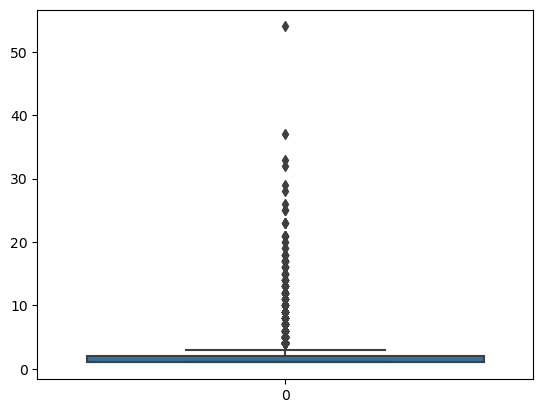

In [63]:
sns.boxplot(data=data_author['counts'])
plt.show()

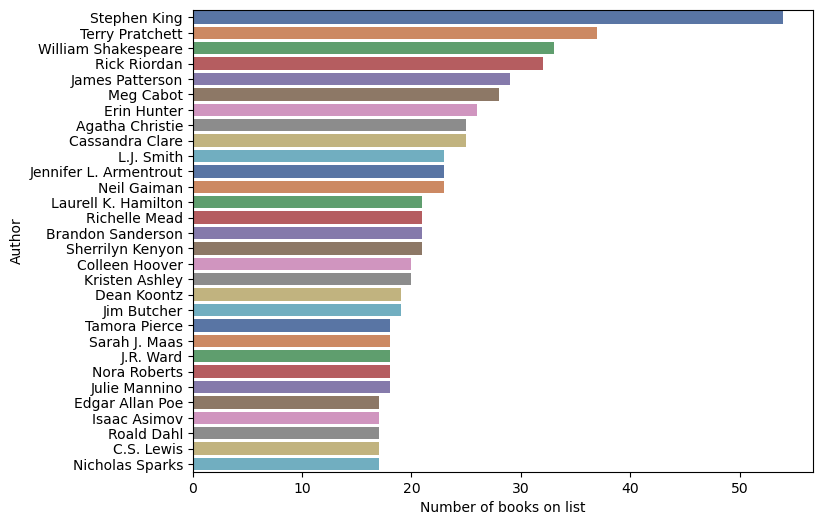

In [64]:
aut = df['author'].value_counts()[:30]

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(ax=ax, x=aut, y=aut.index, palette='deep')
plt.xlabel('Number of books on list')
plt.ylabel('Author')
plt.show()

#### - On the Best_Books_Ever list, the most written books is Stephen King, with 56 books on the list.
#### - Ranked in the top 30 counts, all authors have more than 15 books on the Best_Books_Ever list.
#### - Most authors still have only one book on the Best_Books_Ever list.

### 2.books_written_n: How many books has this author written.

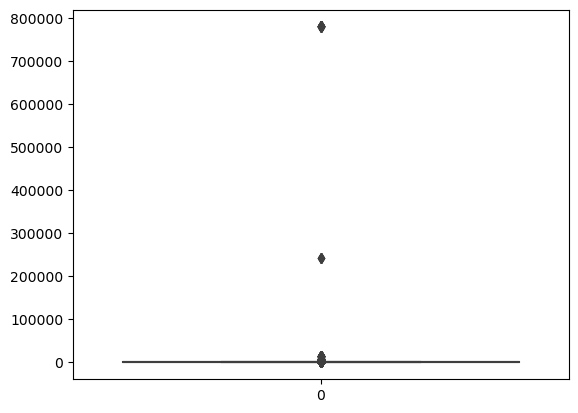

In [65]:
sns.boxplot(data=df['books_written_n'])
plt.show()

In [66]:
df['books_written_n'].mean()

2013.3885909868795

In [67]:
df['books_written_n'].median()

81.0

In [68]:
# Checking how many values will be removed if the outliers are removed
iqr = np.nanpercentile(df['books_written_n'],75) - np.nanpercentile(df['books_written_n'],25)
upper_limit = np.nanpercentile(df['books_written_n'],75) + 1.5*iqr
print(upper_limit)
extraordinary_points = df[df['books_written_n']>1000]
len(extraordinary_points)  # This checks the number of points that will be removed

542.0


754

In [69]:
#dropp the 'books_written_n' bigger than 1000, to see the plot more clear
df_dropped = df[df['books_written_n'] <=1000].copy()

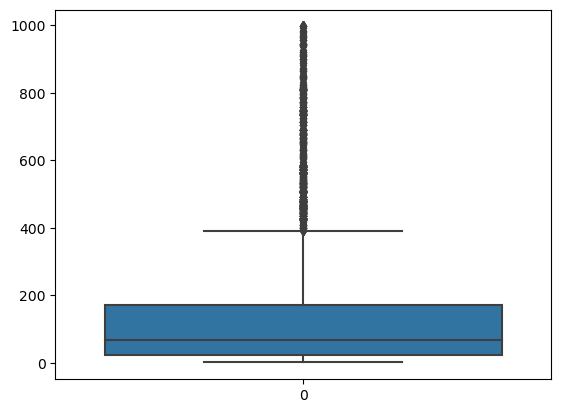

In [70]:
sns.boxplot(data=df_dropped['books_written_n'])
plt.show()

#### -- After removing the 768 authors with more than 1,000 books, we can see that there are still 25% of authors with over 400 books. Most authors have less than 200 books.
#### -- The median is 81, which means that more than half of the authors,who on the Best_Books_Ever list have 81 books.

In [71]:
# Is there really someone who has written more than 10,000 books?
df[df['books_written_n']>10000].head()

,title,author,rating,rating_n,review_n,introduction,genre,books_written_n,author_followers,link,...,pages,bookformat,genre1,genre2,genre3,genre4,genre5,genre6,genre7,rank
27,Romeo and Juliet,William Shakespeare,3.74,2463272,27404,"In Romeo and Juliet, Shakespeare creates a vio...","Classics, Plays, Fiction, Romance, School, Dra...",14200,41400,https://www.goodreads.com/book/show/18135.Rome...,...,281,Paperback,Classics,Plays,Fiction,Romance,School,Drama,Read For School,28
171,A Midsummer Night's Dream,William Shakespeare,3.95,513601,10905,Shakespeare's intertwined love polygons begin ...,"Classics, Plays, Fiction, Fantasy, Drama, Scho...",14200,41400,https://www.goodreads.com/book/show/1622.A_Mid...,...,240,Paperback,Classics,Plays,Fiction,Fantasy,Drama,School,Romance,172
275,Othello,William Shakespeare,3.89,368929,9106,"In Othello, Shakespeare creates a powerful dra...","Classics, Plays, Fiction, Drama, School, Theat...",14200,47300,https://www.goodreads.com/book/show/12996.Othello,...,314,Paperback,Classics,Plays,Fiction,Drama,School,Theatre,Literature,276
283,King Lear,William Shakespeare,3.91,207902,6084,Shakespeare’s King Lear challenges us with the...,"Classics, Plays, Drama, Fiction, School, Theat...",14200,300000,https://www.goodreads.com/book/show/12938.King...,...,338,Paperback,Classics,Plays,Drama,Fiction,School,Theatre,Literature,284
307,The Complete Works,William Shakespeare,4.47,54912,946,Tempest\tTwo Gentlemen of Verona\tMerry Wives ...,"Classics, Poetry, Fiction, Plays, Drama, Liter...",14200,4514,https://www.goodreads.com/book/show/569564.The...,...,1248,other,Classics,Poetry,Fiction,Plays,Drama,Literature,Reference,308


#### --Among the top 300 on the list, those who have written more than 10,000 books is William Shakespeare.
#### --After seach, shows that:His surviving works consist of 38 plays, 154 sonnets, two long narrative poems, and several other poems.These books may contain different versions of the literature. 

### 3.author_followers：How many followers has this author 

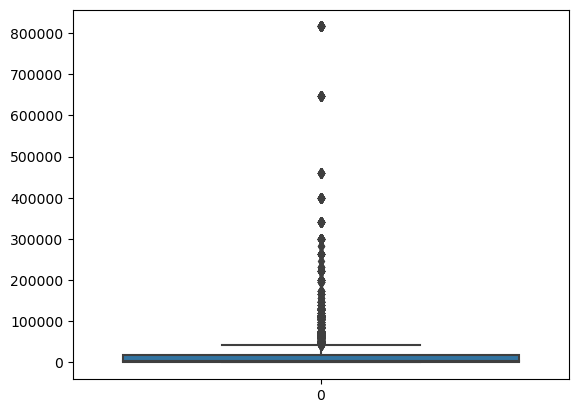

In [72]:
sns.boxplot(data=df['author_followers'])
plt.show()

In [73]:
df['author_followers'].mean()

28106.823730747292

In [74]:
df['author_followers'].median()

4783.0

### 4.rating

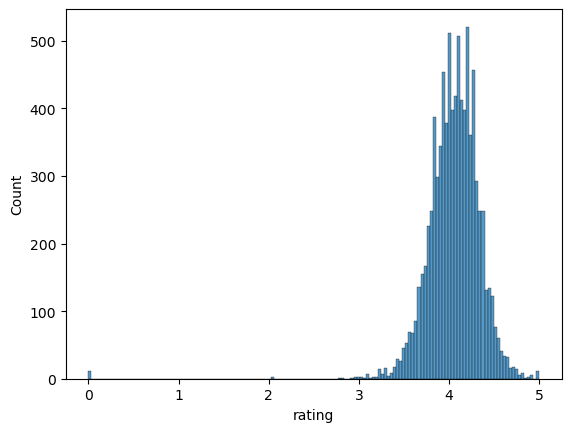

In [75]:
sns.histplot(df['rating'])
plt.show()

#### -- It's Standard Normal Distribution

### 5.rating_n: How many ratings

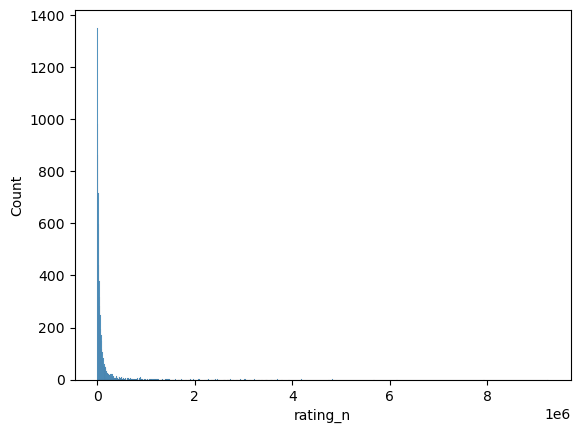

In [76]:
sns.histplot(df['rating_n'])
plt.show()

In [77]:
df['rating_n'].describe()

count    8.765000e+03
mean     1.056912e+05
std      3.271525e+05
min      0.000000e+00
25%      1.233900e+04
50%      3.182200e+04
75%      8.136800e+04
max      9.250462e+06
Name: rating_n, dtype: float64

#### -- There is a big difference in the number of comments.
#### -- Even though it's on the list, there are still some books that don't have any rating.

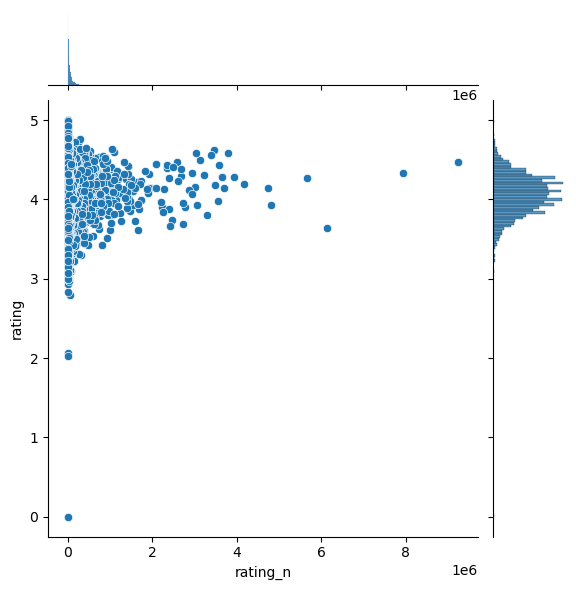

In [78]:
# Distribution of number of ratings and  rating
sns.jointplot(data=df, x="rating_n", y="rating")

### 6.review_n:How many reviews

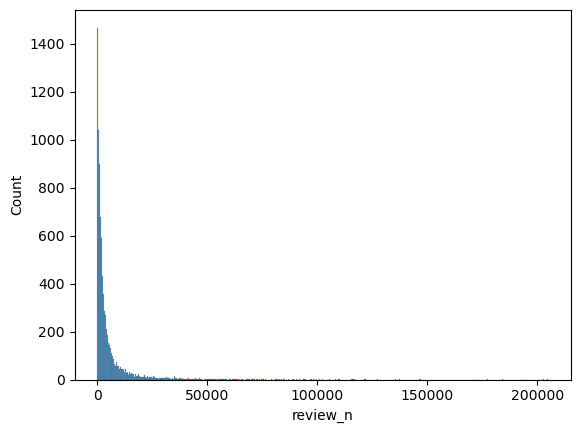

In [79]:
sns.histplot(df['review_n'])
plt.show()

### 7.published_year

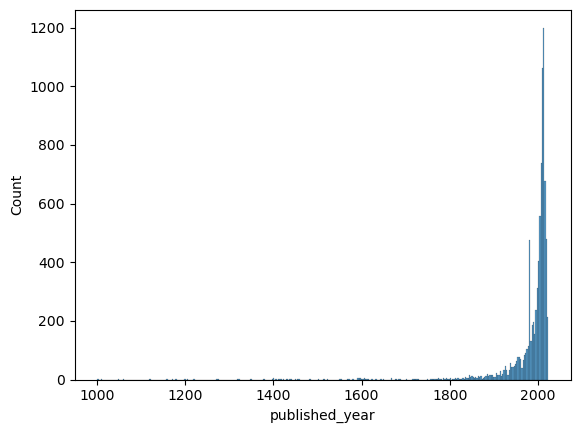

In [80]:
sns.histplot(df['published_year'])
plt.show()

### 8.pages

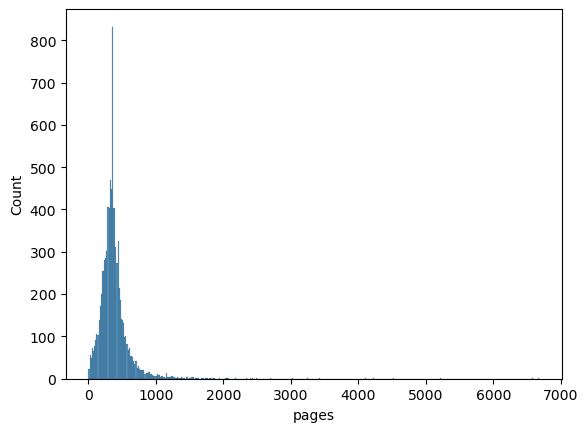

In [81]:
sns.histplot(df['pages'])
plt.show()

### 9.genre

In [82]:
def clean(feature):
    cleaned_feature = list()
    for x in df[feature]:
        if len(x.split(',')) > 1:
            temp = x.split(',')
            for a in temp:
                cleaned_feature.append(a)
        else:
            cleaned_feature.append(x)
    return cleaned_feature

In [83]:
all_genres = clean('genre')
all_genres = [genre.strip() for genre in all_genres]

In [84]:
genres = pd.DataFrame(all_genres, columns = ['genres'])
data_genre = pd.DataFrame(genres.value_counts()).reset_index()
data_genre.columns = ['genre', 'counts']
data_genre.head(10)

,genre,counts
0,Fiction,6425
1,Fantasy,3437
2,Romance,2772
3,Young Adult,2687
4,Classics,1883
5,Contemporary,1720
6,Historical Fiction,1444
7,Mystery,1381
8,Novels,1156
9,Audiobook,1151


<AxesSubplot:xlabel='genres'>

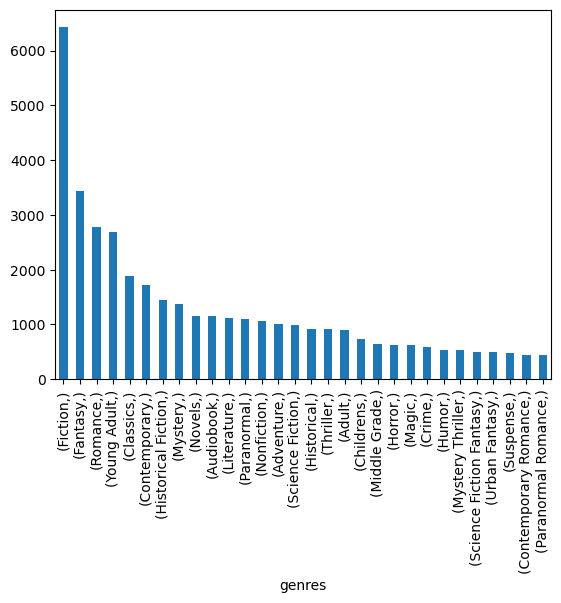

In [85]:
genres.value_counts().head(30).plot.bar()

### 10.pubilshed year
#### the books about vampire

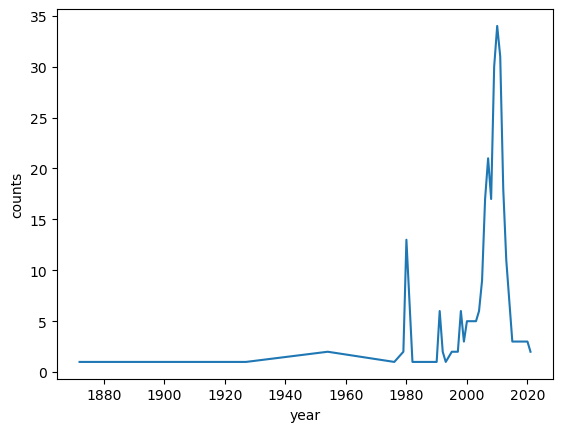

In [86]:
vampire_rows = df[df['introduction'].str.contains('vampire')]
vampire = pd.DataFrame(vampire_rows['published_year'].value_counts()).reset_index()
vampire.columns = ['year', 'counts']
vampire = vampire.sort_values('year')

sns.lineplot(x='year', y='counts', data=vampire)
plt.show()

#### the books about werewolf

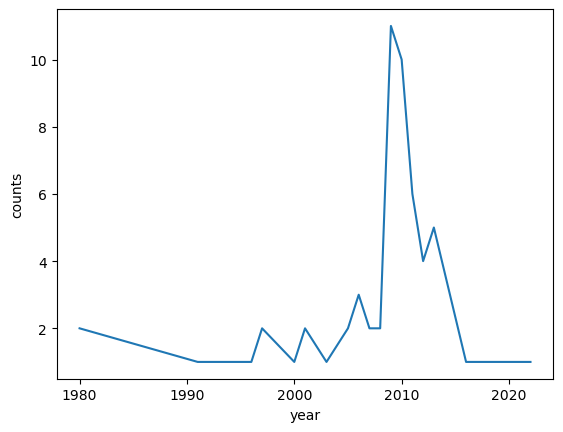

In [87]:
werewolf_rows = df[df['introduction'].str.contains('werewolf')]
werewolf = pd.DataFrame(werewolf_rows['published_year'].value_counts()).reset_index()
werewolf.columns = ['year', 'counts']
werewolf = werewolf.sort_values('year')

sns.lineplot(x='year', y='counts', data=werewolf)
plt.show()

## Top 30 on the list

In [230]:
df_30 = df[df['rank']<=30]
df_30.head()

,index,title,author,rating,rating_n,review_n,introduction,genre,books_written_n,author_followers,...,genre2,genre3,genre4,genre5,genre6,genre7,rank,soup,no_stopwords2,clean_blob
0,0,The Hunger Games,Suzanne Collins,4.33,7938345,195436,"Could you survive on your own in the wild, wit...","Young Adult, Fiction, Dystopia, Fantasy, Scien...",49,93000,...,Fiction,Dystopia,Fantasy,Science Fiction,Romance,Adventure,1,"[hunger, game, could, survive, wild, every, on...","[hunger, game, could, survive, wild, every, on...",hunger game could survive wild every one make ...
1,1,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,3138144,56851,Harry Potter is about to start his fifth year ...,"Fantasy, Young Adult, Fiction, Magic, Children...",562,221000,...,Young Adult,Fiction,Magic,Childrens,Audiobook,Adventure,2,"[harry, potter, order, phoenix, harry, potter,...","[harry, potter, order, phoenix, harry, potter,...",harry potter order phoenix harry potter start ...
2,2,Pride and Prejudice,Jane Austen,4.28,3930925,99795,"Since its immediate success in 1813, Pride and...","Classics, Fiction, Romance, Historical Fiction...",3939,62100,...,Fiction,Romance,Historical Fiction,Literature,Historical,Audiobook,3,"[pride, prejudice, since, immediate, success, ...","[pride, prejudice, since, immediate, success, ...",pride prejudice since immediate success pride ...
3,3,To Kill a Mockingbird,Harper Lee,4.27,5675438,109843,The unforgettable novel of a childhood in a sl...,"Classics, Fiction, Historical Fiction, School,...",69,12900,...,Fiction,Historical Fiction,School,Literature,Young Adult,Historical,4,"[kill, mockingbird, unforgettable, novel, chil...","[kill, mockingbird, unforgettable, novel, chil...",kill mockingbird unforgettable novel childhood...
4,4,The Book Thief,Markus Zusak,4.39,2357114,135561,Librarian's note: An alternate cover edition c...,"Historical Fiction, Fiction, Young Adult, Hist...",27,38100,...,Fiction,Young Adult,Historical,Classics,War,World War II,5,"[book, thief, librarian, note, alternate, cove...","[book, thief, librarian, note, alternate, cove...",book thief librarian note alternate cover edit...


#### 1.author

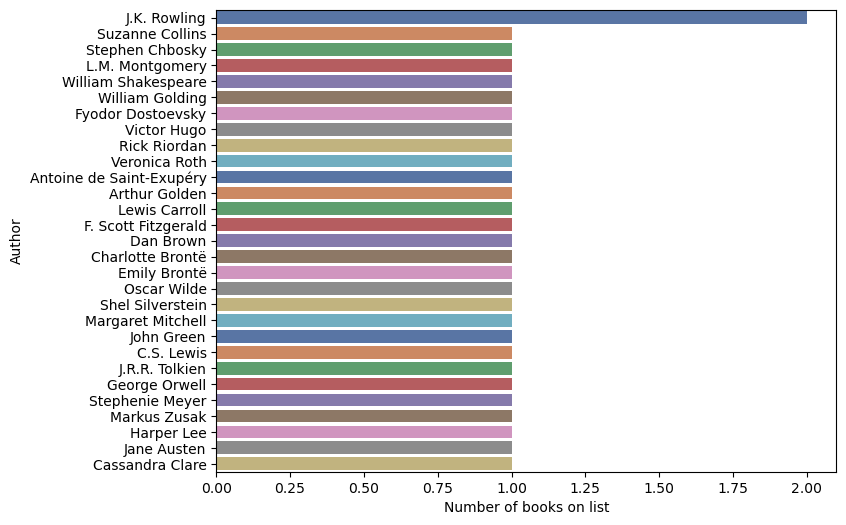

In [89]:
aut = df_30['author'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(ax=ax, x=aut, y=aut.index, palette='deep')
plt.xlabel('Number of books on list')
plt.ylabel('Author')
plt.show()

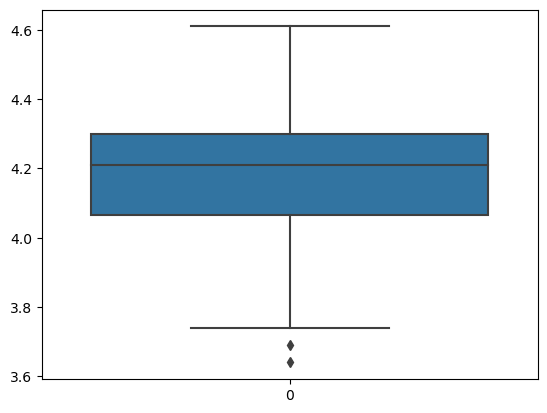

In [90]:
sns.boxplot(data=df_30['rating'])
plt.show()

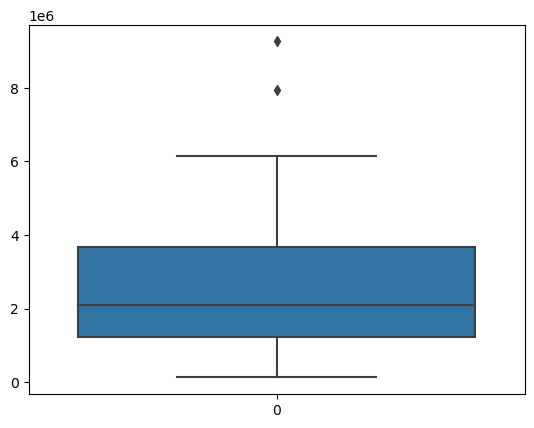

In [91]:
sns.boxplot(data=df_30['rating_n'])
plt.show()

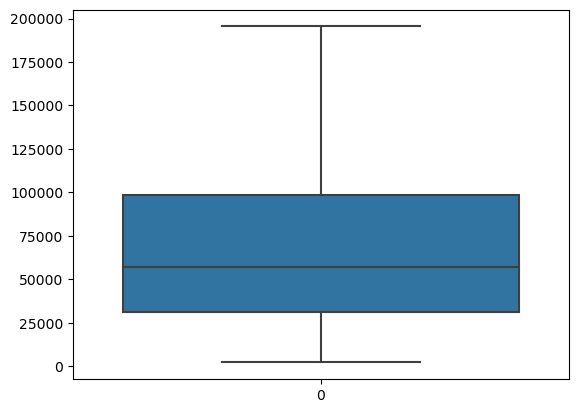

In [92]:
sns.boxplot(data=df_30['review_n'])
plt.show()

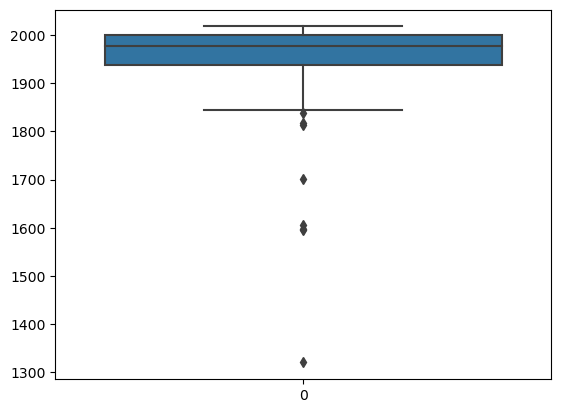

In [226]:
sns.boxplot(data=df_30['published_year'])
plt.show()

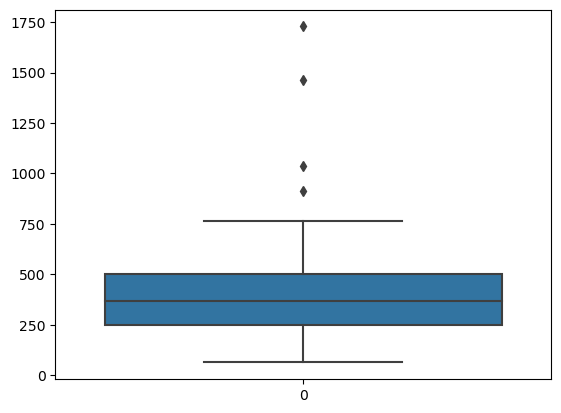

In [94]:
sns.boxplot(data=df_30['pages'])
plt.show()

#### -- Almost all the books on the top30 list that published before year 2000, around 250 - 500 pages, have more than 1000k ratings and 25000 rewiews.

In [95]:
## Check the rating number less than 300.000,but still on the top 300 list.

In [96]:
less_rating_n = df[df['rating_n']<300000].head(50)

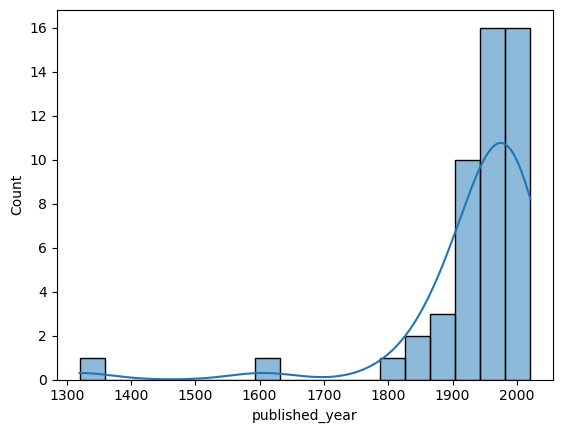

In [97]:
sns.histplot(x='published_year', data=less_rating_n, kde=True)
plt.show()

In [222]:
df[df['published_year']>2010].head(50)

,index,title,author,rating,rating_n,review_n,introduction,genre,books_written_n,author_followers,...,genre2,genre3,genre4,genre5,genre6,genre7,rank,soup,no_stopwords2,clean_blob
9,9,The Fault in Our Stars,John Green,4.15,4748342,172612,Despite the tumor-shrinking medical miracle th...,"Young Adult, Romance, Fiction, Contemporary, R...",209,300000,...,Romance,Fiction,Contemporary,Realistic Fiction,Teen,Coming Of Age,10,"[fault, star, despite, tumor, shrinking, medic...","[fault, star, despite, tumor, shrinking, medic...",fault star despite tumor shrinking medical mir...
22,22,Divergent,Veronica Roth,4.15,3696971,116647,"In Beatrice Prior's dystopian Chicago world, s...","Young Adult, Dystopia, Fantasy, Fiction, Scien...",58,460000,...,Dystopia,Fantasy,Fiction,Science Fiction,Romance,Adventure,23,"[divergent, beatrice, prior, dystopian, chicag...","[divergent, beatrice, prior, dystopian, chicag...",divergent beatrice prior dystopian chicago wor...
148,148,The Addiction Manifesto,Jerry Weaver,4.87,1063,43,2020 International Book Awards Finalist for He...,"Nonfiction, Self Help, Memoir, Mental Health, ...",3,7,...,Self Help,Memoir,Mental Health,Biography,None,None,149,"[addiction, manifesto, international, book, aw...","[addiction, manifesto, international, book, aw...",addiction manifesto international book award f...
151,151,Insurgent,Veronica Roth,3.98,1413556,61912,One choice can transform you—or it can destroy...,"Young Adult, Dystopia, Fiction, Fantasy, Scien...",58,460000,...,Dystopia,Fiction,Fantasy,Science Fiction,Romance,Adventure,152,"[insurgent, one, choice, transform, destroy, e...","[insurgent, one, choice, transform, destroy, e...",insurgent one choice transform destroy every c...
161,161,Clockwork Princess,Cassandra Clare,4.56,421150,37484,"Danger and betrayal, love and loss, secrets an...","Fantasy, Young Adult, Romance, Paranormal, His...",188,263000,...,Young Adult,Romance,Paranormal,Historical Fiction,Steampunk,Urban Fantasy,162,"[clockwork, princess, danger, betrayal, love, ...","[clockwork, princess, danger, betrayal, love, ...",clockwork princess danger betrayal love loss s...
173,173,Six of Crows,Leigh Bardugo,4.50,793930,86975,Ketterdam: a bustling hub of international tra...,"Fantasy, Young Adult, Fiction, Young Adult Fan...",73,147000,...,Young Adult,Fiction,Young Adult Fantasy,Romance,LGBT,Adventure,174,"[six, crow, ketterdam, bustling, hub, internat...","[six, crow, ketterdam, bustling, hub, internat...",six crow ketterdam bustling hub international ...
187,187,Throne of Glass,Sarah J. Maas,4.19,1014375,68509,Meet Celaena Sardothien.Beautiful. Deadly. Des...,"Fantasy, Young Adult, Romance, Fiction, Young ...",88,301000,...,Young Adult,Romance,Fiction,Young Adult Fantasy,Magic,High Fantasy,188,"[throne, glass, meet, celaena, sardothien, bea...","[throne, glass, meet, celaena, sardothien, bea...",throne glass meet celaena sardothien beautiful...
199,199,The Night Circus,Erin Morgenstern,4.03,891997,94640,The circus arrives without warning. No announc...,"Fantasy, Fiction, Romance, Historical Fiction,...",7,48600,...,Fiction,Romance,Historical Fiction,Magical Realism,Magic,Young Adult,200,"[night, circus, circus, arrives, without, warn...","[night, circus, circus, arrives, without, warn...",night circus circus arrives without warning an...
200,200,The Selection,Kiera Cass,4.09,1400932,71497,"For thirty-five girls, the Selection is the ch...","Young Adult, Romance, Dystopia, Fantasy, Ficti...",36,59700,...,Romance,Dystopia,Fantasy,Fiction,Science Fiction,Audiobook,201,"[selection, thirty, five, girl, selection, cha...","[selection, thirty, five, girl, selection, cha...",selection thirty five girl selection chance li...
201,201,Fifty Shades of Grey,E.L. James,3.66,2427844,82271,When literature student Anastasia Steele goes ...,"Romance, Fiction, Erotica, Adult, BDSM, Contem...",50,55600,...,Fiction,Erotica,Adult,BDSM,Contemporary,Contemporary Romance,202,"[fifty, shade, grey, literature, student, anas...","

# Model

In [99]:
df.head()

,title,author,rating,rating_n,review_n,introduction,genre,books_written_n,author_followers,link,...,pages,bookformat,genre1,genre2,genre3,genre4,genre5,genre6,genre7,rank
0,The Hunger Games,Suzanne Collins,4.33,7938345,195436,"Could you survive on your own in the wild, wit...","Young Adult, Fiction, Dystopia, Fantasy, Scien...",49,93000,https://www.goodreads.com/book/show/2767052-th...,...,374,Hardcover,Young Adult,Fiction,Dystopia,Fantasy,Science Fiction,Romance,Adventure,1
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,3138144,56851,Harry Potter is about to start his fifth year ...,"Fantasy, Young Adult, Fiction, Magic, Children...",562,221000,https://www.goodreads.com/book/show/2.Harry_Po...,...,912,Paperback,Fantasy,Young Adult,Fiction,Magic,Childrens,Audiobook,Adventure,2
2,Pride and Prejudice,Jane Austen,4.28,3930925,99795,"Since its immediate success in 1813, Pride and...","Classics, Fiction, Romance, Historical Fiction...",3939,62100,https://www.goodreads.com/book/show/1885.Pride...,...,279,Paperback,Classics,Fiction,Romance,Historical Fiction,Literature,Historical,Audiobook,3
3,To Kill a Mockingbird,Harper Lee,4.27,5675438,109843,The unforgettable novel of a childhood in a sl...,"Classics, Fiction, Historical Fiction, School,...",69,12900,https://www.goodreads.com/book/show/2657.To_Ki...,...,336,Paperback,Classics,Fiction,Historical Fiction,School,Literature,Young Adult,Historical,4
4,The Book Thief,Markus Zusak,4.39,2357114,135561,Librarian's note: An alternate cover edition c...,"Historical Fiction, Fiction, Young Adult, Hist...",27,38100,https://www.goodreads.com/book/show/19063.The_...,...,552,Hardcover,Historical Fiction,Fiction,Young Adult,Historical,Classics,War,World War II,5


### In general, book reviews can replace sales, so we use 'rating' as a forecast target

In [100]:
#X-Y Split, train-test split

X = df.drop(['rating_n','title','author','introduction','genre','link'],axis=1)
y = df['rating_n']

In [101]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)

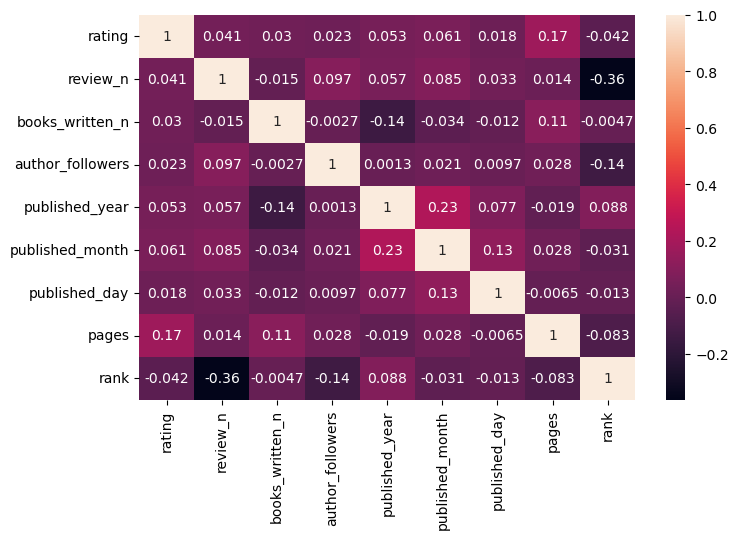

In [102]:
# creating a correlation matrix
correlations_matrix = X_train_num.corr()
# create a heatmap of it
plt.figure(figsize = (8,5))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

#### MinMax Scaler

In [103]:
transformer = MinMaxScaler().fit(X_train_num)
# Scaling
X_train_scaled = pd.DataFrame(transformer.transform(X_train_num), columns=X_train_num.columns, index=X_train_num.index)
X_test_scaled = pd.DataFrame(transformer.transform(X_test_num), columns=X_test_num.columns,index=X_test_num.index)

#### Encode the categorical features using One-Hot Encoding

In [104]:
# Fitting the encoder
encoder = OneHotEncoder(handle_unknown = 'ignore').fit(X_train_cat)
column_name = encoder.get_feature_names_out(X_train_cat.columns)
# Encoding
X_train_hot = pd.DataFrame(encoder.transform(X_train_cat).toarray(), columns = column_name, index=X_train_cat.index)
X_test_hot = pd.DataFrame(encoder.transform(X_test_cat).toarray(), columns = column_name,index=X_test_cat.index)

In [105]:
X_test = pd.concat([X_test_scaled,X_test_hot], axis = 1)
X_train = pd.concat([X_train_scaled,X_train_hot],axis=1)

#### regression models

In [106]:
def models_automation(models, X_train, y_train,X_test,y_test):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

In [107]:
model_list = [LinearRegression(),SGDRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
models_automation(model_list, X_train, y_train,X_test,y_test)

LinearRegression: Train -> 0.7218993947075069, Test -> 0.6274322205643725
SGDRegressor: Train -> 0.7009471842349837, Test -> 0.6727337460122237
KNeighborsRegressor: Train -> 0.503222198392897, Test -> 0.32407530901219017
DecisionTreeRegressor: Train -> 1.0, Test -> 0.7635506381099222
RandomForestRegressor: Train -> 0.9644364417335698, Test -> 0.8898475553313067


In [108]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

LR =RandomForestRegressor().fit(X_train, y_train)
pred = LR.predict(X_test)

In [109]:
r2 = r2_score(y_test,pred)
mse = mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)
rmse = sqrt(mse)

In [110]:
print('R2 Score:', r2)
print('Mean Squared Error:', mse)
print('Mean aboslute Error:', mae)
print('Root Mean Squared Error:',rmse)

R2 Score: 0.8951658757392718
Mean Squared Error: 11013394210.691164
Mean aboslute Error: 28260.513804744525
Root Mean Squared Error: 104944.71978470933


### Generally when people look for books to read, they are looking directly from the list, so this time 'rank' as the target

In [111]:
#X-Y Split, train-test split

X = df.drop(['title','author','introduction','genre','link','rank'],axis=1)
y = df['rank']

In [112]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)

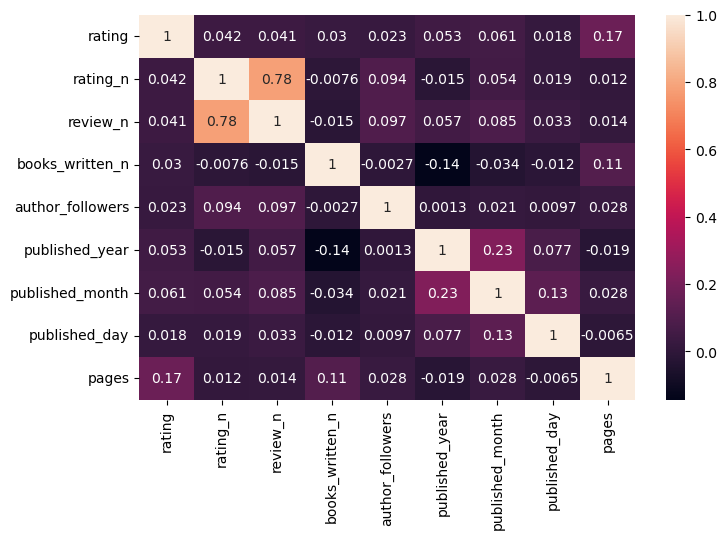

In [113]:
# creating a correlation matrix
correlations_matrix = X_train_num.corr()
# create a heatmap of it
plt.figure(figsize = (8,5))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [114]:
transformer = MinMaxScaler().fit(X_train_num)
# Scaling
X_train_scaled = pd.DataFrame(transformer.transform(X_train_num), columns=X_train_num.columns, index=X_train_num.index)
X_test_scaled = pd.DataFrame(transformer.transform(X_test_num), columns=X_test_num.columns,index=X_test_num.index)

In [115]:
# Fitting the encoder
encoder = OneHotEncoder(handle_unknown = 'ignore').fit(X_train_cat)
column_name = encoder.get_feature_names_out(X_train_cat.columns)
# Encoding
X_train_hot = pd.DataFrame(encoder.transform(X_train_cat).toarray(), columns = column_name, index=X_train_cat.index)
X_test_hot = pd.DataFrame(encoder.transform(X_test_cat).toarray(), columns = column_name,index=X_test_cat.index)

In [116]:
X_test = pd.concat([X_test_scaled,X_test_hot], axis = 1)
X_train = pd.concat([X_train_scaled,X_train_hot],axis=1)

In [117]:
def models_automation(models, X_train, y_train,X_test,y_test):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

In [118]:
model_list = [LinearRegression(),SGDRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
models_automation(model_list, X_train, y_train,X_test,y_test)

LinearRegression: Train -> 0.4958519475223929, Test -> -8.21218820775898e+22
SGDRegressor: Train -> 0.3987660105088594, Test -> 0.19631421530497228
KNeighborsRegressor: Train -> 0.3438698819212448, Test -> 0.017976052325488157
DecisionTreeRegressor: Train -> 1.0, Test -> 0.08266042533970042
RandomForestRegressor: Train -> 0.9378392201494296, Test -> 0.5506939427296327


In [119]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

LR =RandomForestRegressor().fit(X_train, y_train)
pred = LR.predict(X_test)

In [120]:
r2 = r2_score(y_test,pred)
mse = mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)
rmse = sqrt(mse)

In [121]:
print('R2 Score:', r2)
print('Mean Squared Error:', mse)
print('Mean aboslute Error:', mae)
print('Root Mean Squared Error:',rmse)

R2 Score: 0.552046905579565
Mean Squared Error: 2797466.897081797
Mean aboslute Error: 1293.0455702554743
Root Mean Squared Error: 1672.5629725310187


### P-Value

In [122]:
num = X.select_dtypes(np.number)

In [123]:
num.head()

,rating,rating_n,review_n,books_written_n,author_followers,published_year,published_month,published_day,pages
0,4.33,7938345,195436,49,93000,2008,9,14,374
1,4.50,3138144,56851,562,221000,2003,6,21,912
2,4.28,3930925,99795,3939,62100,1813,1,28,279
3,4.27,5675438,109843,69,12900,1960,1,1,336
4,4.39,2357114,135561,27,38100,2006,3,1,552


In [124]:
import statsmodels.api as sm
X_added_constant = sm.add_constant(num)
X_added_constant
model = sm.OLS(y,X_added_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     186.5
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:43:23   Log-Likelihood:                -80351.
No. Observations:                8765   AIC:                         1.607e+05
Df Residuals:                    8755   BIC:                         1.608e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -941.1629    773.332     -1.217      0.224   -2457.075     574.749
rating            -247.5745     84.151     -2.942      0.003    -412.530     -82.619
rating_n            -0.0007      0.000     -5.945      0.000      -0.001      -0.000
review_n            -0.0544      0.003    -17.494      0.000      -0.060      -0.048
books_written_n      0.0009      0.001      1.300      0.194      -0.000       0.002
author_followers    -0.0029      0.000    -10.335      0.000      -0.003      -0.002
published_year       3.5789      0.363      9.872      0.000       2.868       4.289
published_month     -9.3567      6.773     -1.381      0.167     -22.633       3.920
published_day       -0.5201      1.095     -0.475      0.635      -2.667       1.627
pages               -0.6750      0.099     -6.811      0.000      -0.869      -0.481
==============================================================================
Omnibus:                      190.709   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.013
Skew:                           0.223   Prob(JB):                     5.35e-32
Kurtosis:                       2.558   Cond. No.                     1.08e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### rating, rating_n, review_n, author_followers,published_year,pages, the P-value all <0.05. It means, All of these features have an impact on rankings

#### Use these to do again 

In [125]:
#X-Y Split, train-test split

X = df[['rating','rating_n','review_n','author_followers','published_year','pages']]
y = df['rank']

In [126]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)

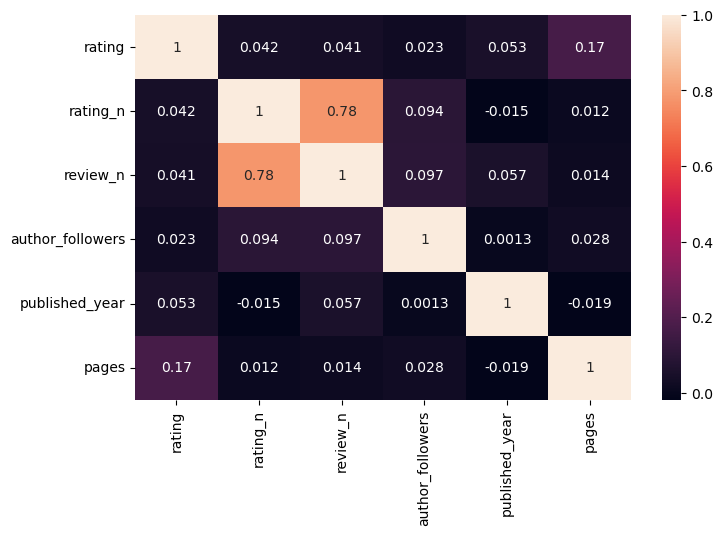

In [127]:
# creating a correlation matrix
correlations_matrix = X_train_num.corr()
# create a heatmap of it
plt.figure(figsize = (8,5))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [128]:
transformer = MinMaxScaler().fit(X_train_num)
# Scaling
X_train_scaled = pd.DataFrame(transformer.transform(X_train_num), columns=X_train_num.columns, index=X_train_num.index)
X_test_scaled = pd.DataFrame(transformer.transform(X_test_num), columns=X_test_num.columns,index=X_test_num.index)

In [129]:
# Fitting the encoder
encoder = OneHotEncoder(handle_unknown = 'ignore').fit(X_train_cat)
column_name = encoder.get_feature_names_out(X_train_cat.columns)
# Encoding
X_train_hot = pd.DataFrame(encoder.transform(X_train_cat).toarray(), columns = column_name, index=X_train_cat.index)
X_test_hot = pd.DataFrame(encoder.transform(X_test_cat).toarray(), columns = column_name,index=X_test_cat.index)

In [130]:
X_test = pd.concat([X_test_scaled,X_test_hot], axis = 1)
X_train = pd.concat([X_train_scaled,X_train_hot],axis=1)

In [131]:
def models_automation(models, X_train, y_train,X_test,y_test):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

In [132]:
model_list = [LinearRegression(),SGDRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
models_automation(model_list, X_train, y_train,X_test,y_test)

LinearRegression: Train -> 0.16202416160958022, Test -> 0.1547478441417075
SGDRegressor: Train -> 0.15651373404653124, Test -> 0.15124373271479696
KNeighborsRegressor: Train -> 0.5294071894082104, Test -> 0.2859265269352025
DecisionTreeRegressor: Train -> 1.0, Test -> -0.006729379692198778
RandomForestRegressor: Train -> 0.9299382527888127, Test -> 0.4887714377655382


In [133]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

LR =RandomForestRegressor().fit(X_train, y_train)
pred = LR.predict(X_test)

In [134]:
r2 = r2_score(y_test,pred)
mse = mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)
rmse = sqrt(mse)

In [135]:
print('R2 Score:', r2)
print('Mean Squared Error:', mse)
print('Mean aboslute Error:', mae)
print('Root Mean Squared Error:',rmse)

R2 Score: 0.49318081166567707
Mean Squared Error: 3165085.630238823
Mean aboslute Error: 1403.6149680656933
Root Mean Squared Error: 1779.0687536570426


#### -- Not improved

# Book recommendation

In [136]:
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [137]:
def soup_book(x):
    soup = x['title']+' '+x['introduction']+' '+x['author']+ ' '+x['genre']
    return soup

In [138]:
df['soup'] = df.apply(soup_book, axis=1)

In [139]:
def clean_up(s):
    s=re.sub(r'http\S+','',s)
    s=re.sub(r'[^A-Za-z]+',' ',s)
    s=s.lower()
    return s

def tokenize(s):
    I = word_tokenize(s)
    I = [word for word in I if word.isalpha()]
    return I

def stem_and_lemmatize(I):
    lemmatizer = WordNetLemmatizer() 
    lemmatized = [lemmatizer.lemmatize(word) for word in I]
    return lemmatized
  
def remove_stopwords(lemmatized):
    without_sw = [word for word in lemmatized if not word in stopwords.words('english')]
    return without_sw

In [140]:
df['soup'] = df['soup'].apply(clean_up).apply(tokenize).apply(stem_and_lemmatize).apply(remove_stopwords)
df.head()

,title,author,rating,rating_n,review_n,introduction,genre,books_written_n,author_followers,link,...,bookformat,genre1,genre2,genre3,genre4,genre5,genre6,genre7,rank,soup
0,The Hunger Games,Suzanne Collins,4.33,7938345,195436,"Could you survive on your own in the wild, wit...","Young Adult, Fiction, Dystopia, Fantasy, Scien...",49,93000,https://www.goodreads.com/book/show/2767052-th...,...,Hardcover,Young Adult,Fiction,Dystopia,Fantasy,Science Fiction,Romance,Adventure,1,"[hunger, game, could, survive, wild, every, on..."
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,3138144,56851,Harry Potter is about to start his fifth year ...,"Fantasy, Young Adult, Fiction, Magic, Children...",562,221000,https://www.goodreads.com/book/show/2.Harry_Po...,...,Paperback,Fantasy,Young Adult,Fiction,Magic,Childrens,Audiobook,Adventure,2,"[harry, potter, order, phoenix, harry, potter,..."
2,Pride and Prejudice,Jane Austen,4.28,3930925,99795,"Since its immediate success in 1813, Pride and...","Classics, Fiction, Romance, Historical Fiction...",3939,62100,https://www.goodreads.com/book/show/1885.Pride...,...,Paperback,Classics,Fiction,Romance,Historical Fiction,Literature,Historical,Audiobook,3,"[pride, prejudice, since, immediate, success, ..."
3,To Kill a Mockingbird,Harper Lee,4.27,5675438,109843,The unforgettable novel of a childhood in a sl...,"Classics, Fiction, Historical Fiction, School,...",69,12900,https://www.goodreads.com/book/show/2657.To_Ki...,...,Paperback,Classics,Fiction,Historical Fiction,School,Literature,Young Adult,Historical,4,"[kill, mockingbird, unforgettable, novel, chil..."
4,The Book Thief,Markus Zusak,4.39,2357114,135561,Librarian's note: An alternate cover edition c...,"Historical Fiction, Fiction, Young Adult, Hist...",27,38100,https://www.goodreads.com/book/show/19063.The_...,...,Hardcover,Historical Fiction,Fiction,Young Adult,Historical,Classics,War,World War II,5,"[book, thief, librarian, note, alternate, cove..."


In [141]:
def remove_sw(row):
    swlist = stopwords.words('english')
    return [word for word in row['soup'] if not word in swlist ]

df['no_stopwords2'] = df.apply(remove_sw,axis=1)


In [142]:
def re_blob(row):
    return " ".join(row['no_stopwords2'])

df['clean_blob'] = df.apply(re_blob,axis=1)
df.head()

,title,author,rating,rating_n,review_n,introduction,genre,books_written_n,author_followers,link,...,genre2,genre3,genre4,genre5,genre6,genre7,rank,soup,no_stopwords2,clean_blob
0,The Hunger Games,Suzanne Collins,4.33,7938345,195436,"Could you survive on your own in the wild, wit...","Young Adult, Fiction, Dystopia, Fantasy, Scien...",49,93000,https://www.goodreads.com/book/show/2767052-th...,...,Fiction,Dystopia,Fantasy,Science Fiction,Romance,Adventure,1,"[hunger, game, could, survive, wild, every, on...","[hunger, game, could, survive, wild, every, on...",hunger game could survive wild every one make ...
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,3138144,56851,Harry Potter is about to start his fifth year ...,"Fantasy, Young Adult, Fiction, Magic, Children...",562,221000,https://www.goodreads.com/book/show/2.Harry_Po...,...,Young Adult,Fiction,Magic,Childrens,Audiobook,Adventure,2,"[harry, potter, order, phoenix, harry, potter,...","[harry, potter, order, phoenix, harry, potter,...",harry potter order phoenix harry potter start ...
2,Pride and Prejudice,Jane Austen,4.28,3930925,99795,"Since its immediate success in 1813, Pride and...","Classics, Fiction, Romance, Historical Fiction...",3939,62100,https://www.goodreads.com/book/show/1885.Pride...,...,Fiction,Romance,Historical Fiction,Literature,Historical,Audiobook,3,"[pride, prejudice, since, immediate, success, ...","[pride, prejudice, since, immediate, success, ...",pride prejudice since immediate success pride ...
3,To Kill a Mockingbird,Harper Lee,4.27,5675438,109843,The unforgettable novel of a childhood in a sl...,"Classics, Fiction, Historical Fiction, School,...",69,12900,https://www.goodreads.com/book/show/2657.To_Ki...,...,Fiction,Historical Fiction,School,Literature,Young Adult,Historical,4,"[kill, mockingbird, unforgettable, novel, chil...","[kill, mockingbird, unforgettable, novel, chil...",kill mockingbird unforgettable novel childhood...
4,The Book Thief,Markus Zusak,4.39,2357114,135561,Librarian's note: An alternate cover edition c...,"Historical Fiction, Fiction, Young Adult, Hist...",27,38100,https://www.goodreads.com/book/show/19063.The_...,...,Fiction,Young Adult,Historical,Classics,War,World War II,5,"[book, thief, librarian, note, alternate, cove...","[book, thief, librarian, note, alternate, cove...",book thief librarian note alternate cover edit...


In [143]:
soups = df['clean_blob']
soups

0       hunger game could survive wild every one make ...
1       harry potter order phoenix harry potter start ...
2       pride prejudice since immediate success pride ...
3       kill mockingbird unforgettable novel childhood...
4       book thief librarian note alternate cover edit...
                              ...                        
8760    police police officer found murdered scene old...
8761    married bad boy mind blown action packed heart...
8762    girl seven name north korean defector story ex...
8763    say nothing true story murder memory northern ...
8764    mean spirit young blood original sassy spooky ...
Name: clean_blob, Length: 8765, dtype: object

In [144]:
count = CountVectorizer(stop_words = "english")
count.fit(soups)

books_matrix = count.transform(df['clean_blob'])

books_matrix.shape

(8765, 52018)

In [145]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(books_matrix)

In [146]:
df = df.reset_index()
indices = pd.Series(df.index, index=df['title'].apply(lambda x: x.lower() if x is not np.nan else "")).drop_duplicates()

In [147]:
#!pip install fuzzywuzzy

In [171]:
from fuzzywuzzy import fuzz
def content_recommender(title):
    title_lower = title.lower()
    if title_lower not in indices:
        # return "This book is not in the Best_Books_Ever list"
        match_scores = [(t, fuzz.ratio(title_lower, t.lower())) for t in indices.keys()]
        match_scores = sorted(match_scores, key=lambda x: x[1], reverse=True)
        closest_matches = [t[0] for t in match_scores[:8]]
        suggestion_str = f"Sorry,This book is not on the Best_Books_Ever list.\nDid you mean one of these books: {', '.join(closest_matches)}? If so, please enter the full book title."
        return suggestion_str
    
    idx = indices[title_lower]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)

    sim_scores = sim_scores[0:10]

    book_indices = [i[0] for i in sim_scores]

    return df.iloc[book_indices]

In [231]:
import ipywidgets as widgets

def show_books():
    bookname = input("Enter a book: ").lower()
    recommendations = content_recommender(bookname)
    if isinstance(recommendations, str):
        print(recommendations)
    else:
        for i in range(5):
            print("--Recommend Book:",recommendations["title"].iloc[i])
            print("Author:",recommendations["author"].iloc[i])
            print("Description:",recommendations["introduction"].iloc[i])
            print("link:",recommendations["link"].iloc[i])
            print("\n")
widgets.interact(show_books);


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Enter a book: magic


# get more data from kaggle

#### the dataset from kaggle: https://www.kaggle.com/datasets/meetnaren/goodreads-best-books-of-2018
#### It's Best_Books_Ever list of 2018
#### I would like to compare with the current list to see the difference

In [191]:
df1 = pd.read_csv('book_data.csv')

In [192]:
df1.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...


In [193]:
df1.columns

Index(['book_authors', 'book_desc', 'book_edition', 'book_format', 'book_isbn',
       'book_pages', 'book_rating', 'book_rating_count', 'book_review_count',
       'book_title', 'genres', 'image_url'],
      dtype='object')

In [194]:
df1 = df1[['book_authors','book_format', 'book_rating', 'book_rating_count', 'book_review_count',
       'book_title', 'genres']]

In [195]:
df1 = df1.rename(columns={'book_authors':'authors', 'book_format':'bookformat', 'book_rating':'rating', 'book_rating_count':'rating_n', 'book_review_count':'review_n',
       'book_title':'title', 'genres':'genre'})

## data cleaning

In [196]:
df1.shape

(54301, 7)

In [197]:
df1.dtypes

authors        object
bookformat     object
rating        float64
rating_n        int64
review_n        int64
title          object
genre          object
dtype: object

In [198]:
df1.isna().sum()

authors          0
bookformat    1656
rating           0
rating_n         0
review_n         0
title            0
genre         3242
dtype: int64

## genre 

In [199]:
df1['genre'].value_counts(dropna=False)

NaN                                                                                                      3242
Fiction                                                                                                   234
Novels                                                                                                    194
Poetry                                                                                                    169
Science Fiction|Fiction                                                                                   156
                                                                                                         ... 
Fiction|Contemporary|Music|Mental Health|Mental Illness                                                     1
Fantasy|Fiction|Young Adult|Christian Fiction|Christian|Christian Fiction|Christian Fantasy|Childrens       1
Fiction|Food and Drink|Food|Romance|Contemporary                                                            1
Poetry|Phi

In [184]:
df1['genre'] = df1['genre'].fillna('unknown')

In [185]:
def clean1(feature):
    cleaned_feature = list()
    for x in df1[feature]:
        if len(x.split('|')) > 1:
            temp = x.split('|')
            for a in temp:
                cleaned_feature.append(a)
        else:
            cleaned_feature.append(x)
    return cleaned_feature

In [186]:
all_genres1 = clean1('genre')
genres1 = pd.DataFrame(all_genres1, columns = ['genres'])
data_genre1 = pd.DataFrame(genres1.value_counts()).reset_index()
data_genre1.columns = ['genre', 'counts']
data_genre1['percentage'] = round(data_genre1['counts']/54301, 2)
data_genre1.head(10)

,genre,counts,percentage
0,Fiction,26007,0.48
1,Fantasy,23722,0.44
2,Romance,18732,0.34
3,Young Adult,11320,0.21
4,Historical,10868,0.20
5,Paranormal,8018,0.15
6,Mystery,7960,0.15
7,Nonfiction,7727,0.14
8,Science Fiction,6821,0.13
9,Historical Fiction,6448,0.12


In [187]:
data_genre['percentage'] = round(data_genre['counts']/8765, 2)
data_genre.head(10)

,genre,counts,percentage
0,Fiction,6425,0.73
1,Fantasy,3437,0.39
2,Romance,2772,0.32
3,Young Adult,2687,0.31
4,Classics,1883,0.21
5,Contemporary,1720,0.20
6,Historical Fiction,1444,0.16
7,Mystery,1381,0.16
8,Novels,1156,0.13
9,Audiobook,1151,0.13


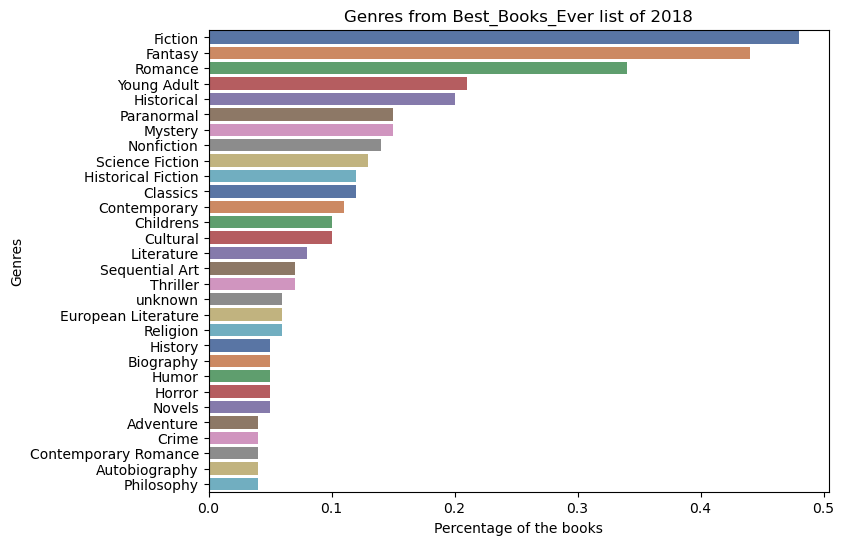

In [219]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=data_genre1.head(30), x='percentage', y='genre', palette='deep')
plt.title('Genres from Best_Books_Ever list of 2018')
plt.xlabel('Percentage of the books')
plt.ylabel('Genres')
plt.show()

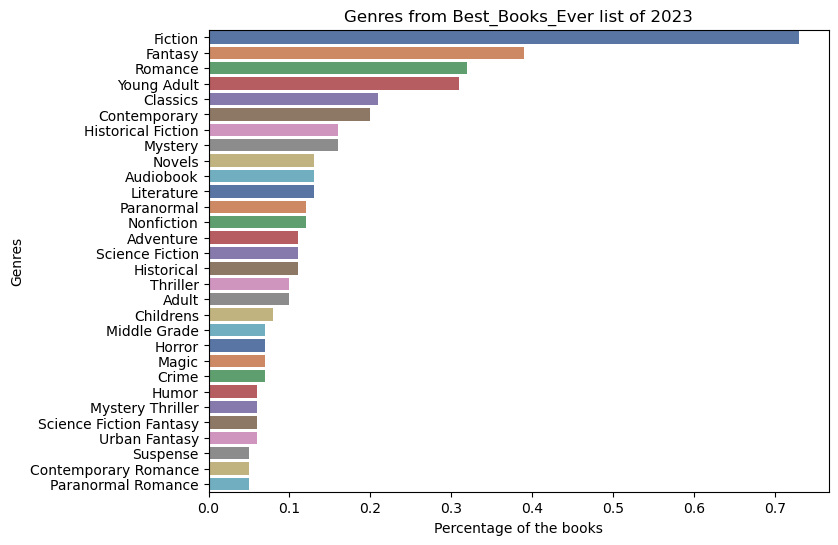

In [220]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=data_genre.head(30), x='percentage', y='genre', palette='deep')
plt.title('Genres from Best_Books_Ever list of 2023')
plt.xlabel('Percentage of the books')
plt.ylabel('Genres')
plt.show()

#### Although only five years, the genres of the novel have changed a lot.
#### 1. Fiction : Fiction is the telling of stories which are not real. More specifically, fiction is an imaginative form of narrative, one of the four basic rhetorical modes. 
#### It accounted for 48% in 2018 and now grows to 73%.
#### 2. Romance: According to the Romance Writers of America, "Two basic elements comprise every romance novel: a central love story and an emotionally-satisfying and optimistic ending." 
####  It is the 3rd most popular, percentage has dropped
#### 3. Young Adult: Young-adult fiction (often abbreviated as YA) is fiction written for, published for, or marketed to adolescents and young adults, roughly ages 13 to 18.
####  Young Adult has increased
#### 4. Historical: History books make up an important genre in non-fiction. They help us understand the past so we can build a better future.
####  It's from #4 in 2018 and now, it's out of top 10. 

### People prefer virtual fiction instead of reading history books which require a lot of concentration.

## bookformat

In [201]:
df1['bookformat'].value_counts()

Paperback                          28725
Hardcover                          12163
Kindle Edition                      5436
Mass Market Paperback               2668
ebook                               2534
                                   ...  
Flexibound                             1
Gebunden                               1
Paperback, Kindle, Ebook, Audio        1
Hard Cover                             1
Bantam New Fiction                     1
Name: bookformat, Length: 147, dtype: int64

In [202]:
data_bookformat1 = pd.DataFrame(df1['bookformat'].value_counts()).reset_index()
data_bookformat1.columns = ['bookformat', 'counts']
data_bookformat1['percentage'] = round(data_bookformat1['counts']/54301, 2)
data_bookformat1.head(10)

,bookformat,counts,percentage
0,Paperback,28725,0.53
1,Hardcover,12163,0.22
2,Kindle Edition,5436,0.10
3,Mass Market Paperback,2668,0.05
4,ebook,2534,0.05
5,Audio CD,164,0.00
6,Nook,144,0.00
7,Audiobook,116,0.00
8,Unknown Binding,102,0.00
9,Audible Audio,60,0.00


In [203]:
data_bookformat = pd.DataFrame(df['bookformat'].value_counts()).reset_index()
data_bookformat.columns = ['bookformat', 'counts']
data_bookformat['percentage'] = round(data_bookformat['counts']/8765, 2)
data_bookformat.head(10)

,bookformat,counts,percentage
0,Paperback,4732,0.54
1,Hardcover,2519,0.29
2,Kindle,725,0.08
3,other,507,0.06
4,ebook,262,0.03
5,Audiobook,20,0.00


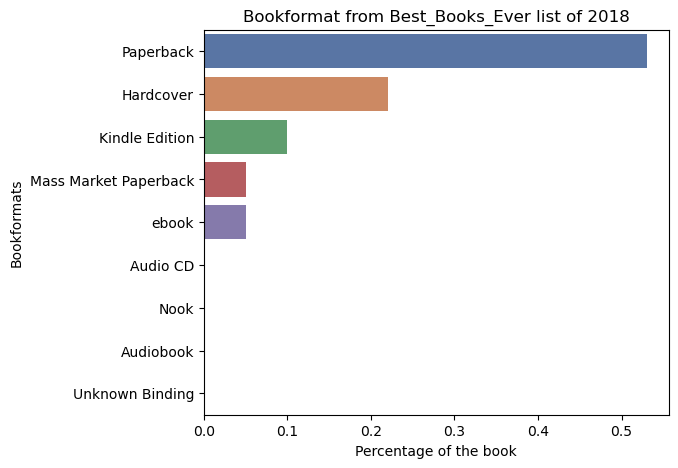

In [210]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(data=data_bookformat1.head(9), x='percentage', y='bookformat', palette='deep')
plt.title('Bookformat from Best_Books_Ever list of 2018')
plt.xlabel('Percentage of the book')
plt.ylabel('Bookformats')
plt.show()

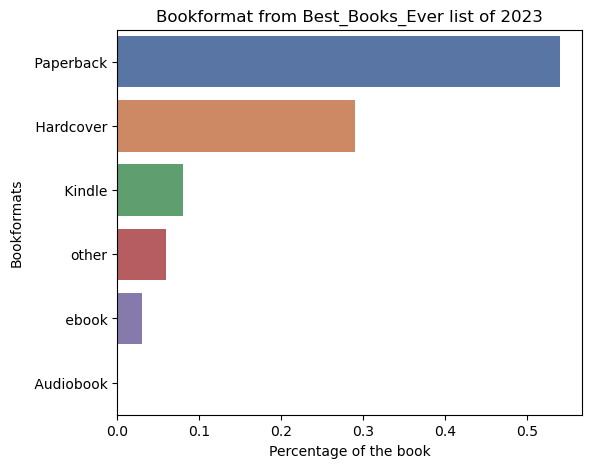

In [211]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(data=data_bookformat.head(9), x='percentage', y='bookformat', palette='deep')
plt.title('Bookformat from Best_Books_Ever list of 2023')
plt.xlabel('Percentage of the book')
plt.ylabel('Bookformats')
plt.show()

#### From 2018 to 2023, hardcover books become more and ebooks become less in proportion

In [217]:
audio = df[df['bookformat']==' Audiobook']

In [218]:
audio[['title', 'author', 'rating', 'rating_n', 'review_n',
       'introduction', 'genre', 'books_written_n', 'author_followers', 'link',
       'published_year',  'pages',
       'bookformat', 'rank']]

,title,author,rating,rating_n,review_n,introduction,genre,books_written_n,author_followers,link,published_year,pages,bookformat,rank
1983,Principles: Life and Work,Ray Dalio,4.12,51565,3181,"Ray Dalio, one of the world’s most successful ...","Business, Nonfiction, Self Help, Leadership, F...",37,771,https://www.goodreads.com/book/show/34536488-p...,2017,592,Audiobook,1984
2116,Temple of the Winds,Terry Goodkind,4.02,79338,1095,Book Four of The Sword of Truth returns listen...,"Fantasy, Fiction, Epic Fantasy, Science Fictio...",252,27000,https://www.goodreads.com/book/show/253058.Tem...,1998,822,Audiobook,2117
2616,The Twilight Saga,Stephenie Meyer,3.92,116864,4062,Stephenie Meyer holds you spellbound with her ...,"Fantasy, Young Adult, Romance, Vampires, Ficti...",95,569,https://www.goodreads.com/book/show/3090465-th...,2005,65,Audiobook,2617
3611,A Lick of Frost,Laurell K. Hamilton,4.14,31742,690,"Commanded by her aunt, the dark Queen Andais, ...","Fantasy, Urban Fantasy, Paranormal, Romance, P...",247,816000,https://www.goodreads.com/book/show/1406197.A_...,2007,8,Audiobook,3612
3929,The Extraordinary Education of Nicholas Benedict,Trenton Lee Stewart,4.37,16894,1382,Nine-year-old Nicholas Benedict has more probl...,"Mystery, Fiction, Middle Grade, Young Adult, A...",22,23500,https://www.goodreads.com/book/show/13152282-t...,2012,14,Audiobook,3930
4088,Death Bringer,Derek Landy,4.48,17647,750,"The sixth instalment in the historic, hysteric...","Fantasy, Young Adult, Urban Fantasy, Fiction, ...",155,7832,https://www.goodreads.com/book/show/10221341-d...,2011,609,Audiobook,4089
4419,The Last Question,Isaac Asimov,4.56,23421,1746,¿Es posible revertir el inevitable final del U...,"Science Fiction, Short Stories, Fiction, Class...",3454,985,https://www.goodreads.com/book/show/4808763-th...,1956,9,Audiobook,4420
4525,The Ring of Solomon,Jonathan Stroud,4.21,29694,1520,"It is 950 B.C.E., and King Solomon rules Jerus...","Fantasy, Young Adult, Fiction, Magic, Adventur...",62,434,https://www.goodreads.com/book/show/7640705-th...,2010,13,Audiobook,4526
4551,The Invisible Bridge,Julie Orringer,4.18,51542,5218,A grand love story and an epic tale of three b...,"Historical Fiction, Fiction, World War II, Hol...",15,85400,https://www.goodreads.com/book/show/7274337-th...,2010,28,Audiobook,4552
4635,The Never War,D.J. MacHale,4.13,30120,580,Bobby Pendragon has visited the alternate dime...,"Fantasy, Young Adult, Fiction, Science Fiction...",75,808,https://www.goodreads.com/book/show/536982.The...,2003,352,Audiobook,4636
